# STOR 120: Class 5 - Building Tables for Visualization

In [28]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Minard

In [2]:
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City,Direction,Survivors
24,54.9,Kaunas,Advance,340000
30.2,55.2,Vitebsk,Advance,175000
32,54.8,Smolensk,Advance,145000
37.6,55.8,Moscow,Advance,100000
34.3,55.2,Vyazma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orsha,Retreat,20000
26.8,54.3,Maladyechna,Retreat,12000
24.1,54.4,Kaunas,Retreat,4000


What percentage of Napoleon’s troops were still alive in each city of the advance and retreat?


In [3]:
minard.column("Survivors").item(0)

340000

In [4]:
minard.column("Survivors")/minard.column("Survivors").item(0)

array([ 1.        ,  0.51470588,  0.42647059,  0.29411765,  0.16176471,
        0.07058824,  0.05882353,  0.03529412,  0.01176471])

In [5]:
minard = minard.with_column(
    'Pct Alive',
    minard.column("Survivors")/minard.column("Survivors").item(0)
)
minard

Longitude,Latitude,City,Direction,Survivors,Pct Alive
24,54.9,Kaunas,Advance,340000,1
30.2,55.2,Vitebsk,Advance,175000,0.514706
32,54.8,Smolensk,Advance,145000,0.426471
37.6,55.8,Moscow,Advance,100000,0.294118
34.3,55.2,Vyazma,Retreat,55000,0.161765
32,54.6,Smolensk,Retreat,24000,0.0705882
30.4,54.4,Orsha,Retreat,20000,0.0588235
26.8,54.3,Maladyechna,Retreat,12000,0.0352941
24.1,54.4,Kaunas,Retreat,4000,0.0117647


In [6]:
minard.set_format('Pct Alive', PercentFormatter) #changes num value of a column to percent 

Longitude,Latitude,City,Direction,Survivors,Pct Alive
24,54.9,Kaunas,Advance,340000,100.00%
30.2,55.2,Vitebsk,Advance,175000,51.47%
32,54.8,Smolensk,Advance,145000,42.65%
37.6,55.8,Moscow,Advance,100000,29.41%
34.3,55.2,Vyazma,Retreat,55000,16.18%
32,54.6,Smolensk,Retreat,24000,7.06%
30.4,54.4,Orsha,Retreat,20000,5.88%
26.8,54.3,Maladyechna,Retreat,12000,3.53%
24.1,54.4,Kaunas,Retreat,4000,1.18%


In [7]:
minard.set_format('Pct Alive', PercentFormatter).column('Pct Alive') #the column is still is proportion, just displayed differently

array([ 1.        ,  0.51470588,  0.42647059,  0.29411765,  0.16176471,
        0.07058824,  0.05882353,  0.03529412,  0.01176471])

## Table Review: Sleep Study

In [8]:
sleep = Table.read_table('SleepStudy.csv')
sleep.show(5) #shows first five rows

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,1,Lark,5,1,3.76,0,1.39,9,1,4,6,normal,normal,normal,11,32,Light,2,23.5,7.17,6.77,27,8,7.25,6.9,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0


In [9]:
# Create a table with only 4th year students
sleep.where('ClassYear', 4)

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0
1,4,Neither,0,0,3.5,0,-0.04,6,14,8,28,moderate,moderate,high,50,22,Abstain,0,23.8,8.95,9.05,26,10.75,9,9.04,0
0,4,Neither,2,1,2.9,0,0.72,2,6,11,31,normal,moderate,high,48,30,Moderate,6,26.2,8,6.6,25.38,10.25,6.88,6.68,0
0,4,Neither,2,1,2.9,0,-0.04,8,18,12,26,moderate,moderate,high,56,17,Moderate,5,24.4,8.6,8.4,25.5,11,9,8.57,0
0,4,Neither,2,1,3.4,3,0.78,9,4,5,9,normal,normal,normal,18,27,Light,3,23.9,7.8,8,25.25,10,7,7.71,0
0,4,Neither,2,1,3,2,-0.86,6,7,8,14,normal,moderate,normal,29,25,Moderate,5,25,8.6,8.1,25.5,8.5,5.75,7.43,0
0,4,Neither,3,1,2.8,0,-1.27,3,4,1,2,normal,normal,normal,7,18,Light,6,23.8,8.1,8.4,25.25,10.75,9.25,8.64,0


In [10]:
sleep.where('ClassYear', are.equal_to (4)) #same as above

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0
1,4,Neither,0,0,3.5,0,-0.04,6,14,8,28,moderate,moderate,high,50,22,Abstain,0,23.8,8.95,9.05,26,10.75,9,9.04,0
0,4,Neither,2,1,2.9,0,0.72,2,6,11,31,normal,moderate,high,48,30,Moderate,6,26.2,8,6.6,25.38,10.25,6.88,6.68,0
0,4,Neither,2,1,2.9,0,-0.04,8,18,12,26,moderate,moderate,high,56,17,Moderate,5,24.4,8.6,8.4,25.5,11,9,8.57,0
0,4,Neither,2,1,3.4,3,0.78,9,4,5,9,normal,normal,normal,18,27,Light,3,23.9,7.8,8,25.25,10,7,7.71,0
0,4,Neither,2,1,3,2,-0.86,6,7,8,14,normal,moderate,normal,29,25,Moderate,5,25,8.6,8.1,25.5,8.5,5.75,7.43,0
0,4,Neither,3,1,2.8,0,-1.27,3,4,1,2,normal,normal,normal,7,18,Light,6,23.8,8.1,8.4,25.25,10.75,9.25,8.64,0


In [11]:
# Create a table with students who average more than 7, but less than 9 hours each night.
sleep.where('AverageSleep', are.between(7, 9)) #includes lower bound but not upper bound

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
1,2,Lark,2,1,3.35,2,0.41,2,1,0,1,normal,normal,normal,2,25,Moderate,6,25.35,8.48,7.73,25.63,10.13,7,7.52,1
0,1,Neither,2,1,4,0,1.03,5,12,16,20,moderate,severe,high,48,29,Light,3,24.4,8.75,8.25,24,9,9.25,8.54,0
1,2,Neither,1,1,3.7,0,0.06,11,2,12,13,normal,moderate,normal,27,14,Moderate,10,25,8.53,8.23,25.25,10.75,7.75,8.09,0
1,2,Neither,0,0,3,0,-0.47,8,2,8,11,normal,moderate,normal,21,24,Moderate,10,25.3,9.8,8.4,26.5,10.75,8.5,8.43,0
1,3,Neither,2,1,3.3,6,0.04,7,3,3,2,normal,normal,normal,8,20,Light,5,25.6,8.73,7.03,27.25,11.5,8.5,7.45,0
0,3,Neither,5,1,3.5,1,-0.4,4,2,0,3,normal,normal,normal,5,28,Abstain,0,22.9,6.9,8.4,22.25,9.5,10.25,8.93,0
0,3,Lark,0,0,3.4,0,0.4,4,3,1,11,normal,normal,normal,15,23,Light,2,24,8.77,8.67,25.25,10.5,9.5,8.9,0
0,2,Neither,2,1,2.8,5,-0.8,8,16,7,21,moderate,normal,high,44,25,Moderate,4,22.9,6.85,8.25,23.75,9.09,8.59,8.34,0
1,2,Lark,5,1,3,0,-1.18,8,23,12,20,severe,moderate,high,55,24,Heavy,12,24,7.9,8.5,25.5,10.5,7.5,8.22,0


In [12]:
# Create a table with students who average more than 7, but less than 9 hours each night.
sleep.where('AverageSleep', are.strictly_between(7, 9)) #doesn't include lower bound and upper bound

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
1,2,Lark,2,1,3.35,2,0.41,2,1,0,1,normal,normal,normal,2,25,Moderate,6,25.35,8.48,7.73,25.63,10.13,7,7.52,1
0,1,Neither,2,1,4,0,1.03,5,12,16,20,moderate,severe,high,48,29,Light,3,24.4,8.75,8.25,24,9,9.25,8.54,0
1,2,Neither,1,1,3.7,0,0.06,11,2,12,13,normal,moderate,normal,27,14,Moderate,10,25,8.53,8.23,25.25,10.75,7.75,8.09,0
1,2,Neither,0,0,3,0,-0.47,8,2,8,11,normal,moderate,normal,21,24,Moderate,10,25.3,9.8,8.4,26.5,10.75,8.5,8.43,0
1,3,Neither,2,1,3.3,6,0.04,7,3,3,2,normal,normal,normal,8,20,Light,5,25.6,8.73,7.03,27.25,11.5,8.5,7.45,0
0,3,Neither,5,1,3.5,1,-0.4,4,2,0,3,normal,normal,normal,5,28,Abstain,0,22.9,6.9,8.4,22.25,9.5,10.25,8.93,0
0,3,Lark,0,0,3.4,0,0.4,4,3,1,11,normal,normal,normal,15,23,Light,2,24,8.77,8.67,25.25,10.5,9.5,8.9,0
0,2,Neither,2,1,2.8,5,-0.8,8,16,7,21,moderate,normal,high,44,25,Moderate,4,22.9,6.85,8.25,23.75,9.09,8.59,8.34,0
1,2,Lark,5,1,3,0,-1.18,8,23,12,20,severe,moderate,high,55,24,Heavy,12,24,7.9,8.5,25.5,10.5,7.5,8.22,0


In [13]:
# On average, how long do "Lark's" sleep?
np.mean(sleep.where('LarkOwl', 'Lark').column('AverageSleep'))

7.9473170731707325

In [14]:
sleep.where('LarkOwl', 'Lark').column('AverageSleep').mean()

7.9473170731707325

In [15]:
# How many students get at least 8 hours of sleep each night (on average)?
len(sleep.where('AverageSleep', are.above_or_equal_to(8)).column('ClassesMissed'))

127

In [16]:
sleep.where('AverageSleep', are.above_or_equal_to(8)).num_rows

127

In [17]:
# How many students missed fewer than 3 classes?
sleep.where('ClassesMissed', are.below(3)).num_rows

182

## Census ##

In [18]:
full = Table.read_table('nc-est2021-agesex-res.csv')
full

SEX,AGE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021
0,0,3733173,3699196,3564493
0,1,3775586,3762475,3702936
0,2,3871739,3852130,3767428
0,3,3964565,3931443,3856743
0,4,4047488,4035968,3935738
0,5,4076067,4072698,4040153
0,6,4046735,4060909,4076629
0,7,4052265,4048019,4064596
0,8,4071358,4055165,4051555
0,9,4112302,4100071,4058615


In [19]:
partial = full.drop('POPESTIMATE2020')
partial

SEX,AGE,ESTIMATESBASE2020,POPESTIMATE2021
0,0,3733173,3564493
0,1,3775586,3702936
0,2,3871739,3767428
0,3,3964565,3856743
0,4,4047488,3935738
0,5,4076067,4040153
0,6,4046735,4076629
0,7,4052265,4064596
0,8,4071358,4051555
0,9,4112302,4058615


In [20]:
simple = partial.relabel('ESTIMATESBASE2020', '2020').relabel('POPESTIMATE2021', '2021')
simple

SEX,AGE,2020,2021
0,0,3733173,3564493
0,1,3775586,3702936
0,2,3871739,3767428
0,3,3964565,3856743
0,4,4047488,3935738
0,5,4076067,4040153
0,6,4046735,4076629
0,7,4052265,4064596
0,8,4071358,4051555
0,9,4112302,4058615


In [21]:
partial.sort('AGE') #1 and 2 represents male and female, 0 represents sum of male and female

SEX,AGE,2020,2021
0,0,3733173,3564493
1,0,1907982,1821502
2,0,1825191,1742991
0,1,3775586,3702936
1,1,1928926,1893355
2,1,1846660,1809581
0,2,3871739,3767428
1,2,1980392,1923960
2,2,1891347,1843468
0,3,3964565,3856743


In [22]:
partial.sort('AGE', descending = True) #999 means combined 

SEX,AGE,2020,2021
0,999,331449281,331893745
1,999,164192524,164384742
2,999,167256757,167509003
0,100,103442,97914
1,100,24968,24487
2,100,78474,73427
0,99,58641,52579
1,99,15569,13957
2,99,43072,38622
0,98,79367,78467


## Visualization ##

In [23]:
no_999 = partial.where('AGE', are.below(999))

In [24]:
everyone = no_999.where('SEX', 0).drop('SEX') #drop sex because they'll all be the same value (0)
everyone

AGE,2020,2021
0,3733173,3564493
1,3775586,3702936
2,3871739,3767428
3,3964565,3856743
4,4047488,3935738
5,4076067,4040153
6,4046735,4076629
7,4052265,4064596
8,4071358,4051555
9,4112302,4058615


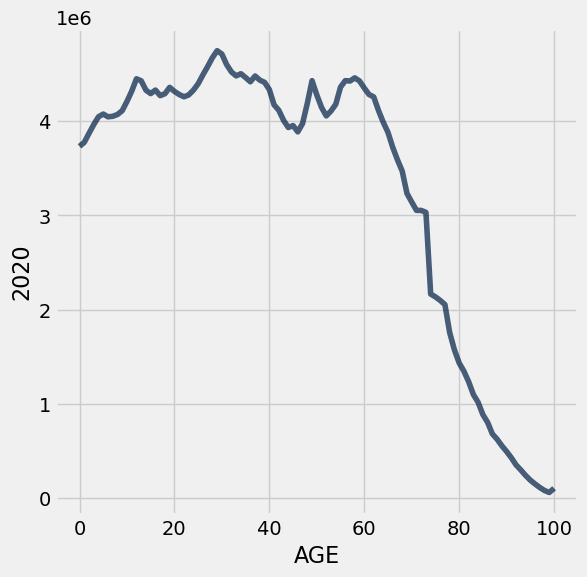

In [29]:
everyone.plot('AGE', '2020')

In [26]:
# If your plot does not show, you may need to update matplotlib-inline
!pip show matplotlib-inline

Name: matplotlib-inline
Version: 0.1.7
Summary: Inline Matplotlib backend for Jupyter
Home-page: https://github.com/ipython/matplotlib-inline
Author: 
Author-email: IPython Development Team <ipython-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2019-2022, IPython Development Team.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permiss

In [27]:
pip install matplotlib-inline --upgrade

Note: you may need to restart the kernel to use updated packages.


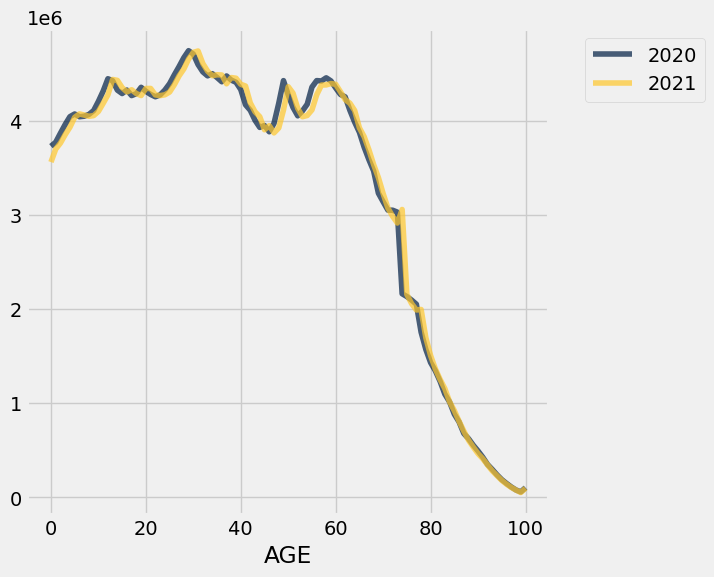

In [31]:
everyone.plot('AGE') #plot this on horitontal, everything else on vertical

## What proportion of each age group were female in 2020?